<a href="https://colab.research.google.com/github/llavkush/HelloWorld/blob/master/Cat_breed_image_classificationmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
!pip install opendatasets --upgrade --quiet

In [26]:
#Imorting Required Library
import opendatasets as od
import torch
import torchvision
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from torch.utils.data import random_split
from sklearn.preprocessing import LabelEncoder
from torch.utils.data.sampler import SubsetRandomSampler
from torchvision.transforms import ToTensor
from torchvision import transforms
from torchvision.transforms import Resize
import torch.optim as optim
from torch.utils.data import Dataset

from PIL import Image
%matplotlib inline

In [3]:
dataset_url = 'https://www.kaggle.com/ma7555/cat-breeds-dataset'
od.download(dataset_url)

  1%|          | 21.0M/1.93G [00:00<00:09, 216MB/s]

100%|██████████| 1.93G/1.93G [00:19<00:00, 109MB/s] 


In [27]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
from torchvision import transforms
from torchvision.transforms import Resize


In [29]:
BASE_PATH = '/content/cat-breeds-dataset/images'#os.listdir(data_dir + '/images')
#print(train_list)

In [30]:
breeds = ['Bombay',
          'Calico',
          'Burmese',
          'Himalayan',
          'Munchkin',
          'Siberian',
          'Ragdoll',
          'Russian Blue',
          'British Shorthair',
          'Dilute Calico']

In [31]:
image=[]
labels=[]
for file in os.listdir(BASE_PATH):
    if file=='Bombay':
        for c in os.listdir(os.path.join(BASE_PATH, file)):
            if c!='annotations':
                image.append(c)
                labels.append('Bombay')
    if file=='Calico':
        for c in os.listdir(os.path.join(BASE_PATH, file)):
            if c!='annotations':
                image.append(c)
                labels.append('Calico')
    if file=='Burmese':
        for c in os.listdir(os.path.join(BASE_PATH, file)):
            if c!='annotations':
                image.append(c)
                labels.append('Burmese')
    if file=='Munchkin':
        for c in os.listdir(os.path.join(BASE_PATH, file)):
            if c!='annotations':
                image.append(c)
                labels.append('Munchkin')
    if file=='Siberian':
        for c in os.listdir(os.path.join(BASE_PATH, file)):
            if c!='annotations':
                image.append(c)
                labels.append('Siberian')
    if file=='Ragdoll':
        for c in os.listdir(os.path.join(BASE_PATH, file)):
            if c!='annotations':
                image.append(c)
                labels.append('Ragdoll')
    if file=='Russian Blue':
        for c in os.listdir(os.path.join(BASE_PATH, file)):
            if c!='annotations':
                image.append(c)
                labels.append('Russian Blue')
    if file=='British Shorthair':
        for c in os.listdir(os.path.join(BASE_PATH, file)):
            if c!='annotations':
                image.append(c)
                labels.append('British Shorthair')
    if file=='Dilute Calico':
        for c in os.listdir(os.path.join(BASE_PATH, file)):
            if c!='annotations':
                image.append(c)
                labels.append('Dilute Calico')
    if file=='Himalayan':
        for c in os.listdir(os.path.join(BASE_PATH, file)):
            if c!='annotations':
                image.append(c)
                labels.append('Himalayan')
    

data = {'Images':image, 'labels':labels} 
data = pd.DataFrame(data) 
data.head()

,Images,labels
0,44519422_3571.jpg,Russian Blue
1,41351653_7318.jpg,Russian Blue
2,42940988_5454.jpg,Russian Blue
3,41370622_7306.jpg,Russian Blue
4,45041701_2863.jpg,Russian Blue


In [32]:
lb = LabelEncoder()
data['encoded_labels'] = lb.fit_transform(data['labels'])
data.head()

,Images,labels,encoded_labels
0,44519422_3571.jpg,Russian Blue,8
1,41351653_7318.jpg,Russian Blue,8
2,42940988_5454.jpg,Russian Blue,8
3,41370622_7306.jpg,Russian Blue,8
4,45041701_2863.jpg,Russian Blue,8


In [33]:
data['encoded_labels'].unique()


array([8, 1, 7, 2, 3, 4, 5, 6, 9, 0])

In [34]:
data['labels'].unique()


array(['Russian Blue', 'British Shorthair', 'Ragdoll', 'Burmese',
       'Calico', 'Dilute Calico', 'Himalayan', 'Munchkin', 'Siberian',
       'Bombay'], dtype=object)

## **Splitting DataSet**

In [35]:
batch_size = 64
validation_split = .3
shuffle_dataset = True
random_seed= 42

In [36]:
# Creating data indices for training and validation splits:
dataset_size = len(data)
indices = list(range(dataset_size))
split = int(np.floor(validation_split * dataset_size))
if shuffle_dataset :
    np.random.seed(random_seed)
    np.random.shuffle(indices)
train_indices, val_indices = indices[split:], indices[:split]

In [37]:
# Creating PT data samplers and loaders:
from torch.utils.data.sampler import SubsetRandomSampler
train_sampler = SubsetRandomSampler(train_indices)
valid_sampler = SubsetRandomSampler(val_indices)

In [38]:
transform = transforms.Compose(
    [transforms.ToTensor(),transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
     ])
#transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))

In [72]:
class CatBreed_Dataset(Dataset):
    def __init__(self, img_data,img_path,transform=None):
        self.img_path = img_path
        self.transform = transform
        self.img_data = img_data
        
    def __len__(self):
        return len(self.img_data)
    
    def __getitem__(self, index):
        img_name = os.path.join(self.img_path,self.img_data.loc[index, 'labels'],
                                self.img_data.loc[index, 'Images'])
        image = Image.open(img_name)
        image = image.convert('RGB')
        image = image.resize((300,300))
        label = torch.tensor(self.img_data.loc[index, 'encoded_labels'])
        if self.transform is not None:
            image = self.transform(image)
        return image, label

In [73]:
dataset = CatBreed_Dataset(data, BASE_PATH, transform)

In [74]:
train_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, 
                                           sampler=train_sampler)
validation_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                                sampler=valid_sampler)

In [75]:
print(len(train_loader))
len(validation_loader)

172


74

# Visualization

In [76]:
breeds = ['Bombay',
          'Calico',
          'Burmese',
          'Himalayan',
          'Munchkin',
          'Siberian',
          'Ragdoll',
          'Russian Blue',
          'British Shorthair',
          'Dilute Calico']

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


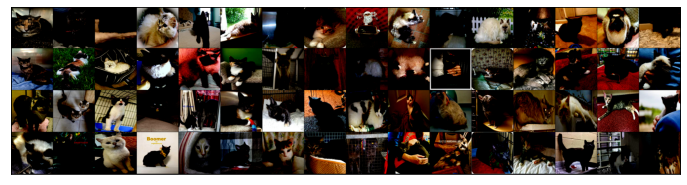

In [77]:
from torchvision.utils import make_grid

for images, labels in train_loader:
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow= 16).permute(1, 2, 0))
        break

## **The Neural Network**

In [78]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [81]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # 3 input image channel, 16 output channels, 3x3 square convolution kernel
        self.conv1 = nn.Conv2d(3,16,kernel_size=3,stride=2,padding=1)
        self.conv2 = nn.Conv2d(16, 32,kernel_size=3,stride=2, padding=1)
        self.conv3 = nn.Conv2d(32, 64,kernel_size=3,stride=2, padding=1)
        self.conv4 = nn.Conv2d(64, 64,kernel_size=3,stride=2, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout2d(0.4)
        self.batchnorm1 = nn.BatchNorm2d(16)
        self.batchnorm2 = nn.BatchNorm2d(32)
        self.batchnorm3 = nn.BatchNorm2d(64)
        self.fc1 = nn.Linear(64*5*5,512 )
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)
        
    def forward(self, x):
        x = self.batchnorm1(F.relu(self.conv1(x)))
        x = self.batchnorm2(F.relu(self.conv2(x)))
        x = self.dropout(self.batchnorm2(self.pool(x)))
        x = self.batchnorm3(self.pool(F.relu(self.conv3(x))))
        x = self.dropout(self.conv4(x))
        x = x.view(-1, 64*5*5) # Flatten layer 64*5*5
        #x = x.view(x.size(0), -1)

        x = self.dropout(self.fc1(x))
        x = self.dropout(self.fc2(x))
        x = F.log_softmax(self.fc3(x),dim = 1)
        return x

In [82]:
#device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


In [83]:
model = Net() # On CPU
#model = Net().to(device)  # On GPU
print(model)

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv4): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout2d(p=0.4, inplace=False)
  (batchnorm1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=1600, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
)


In [84]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

In [85]:
def accuracy(out, labels):
    _,pred = torch.max(out, dim=1)
    return torch.sum(pred==labels).item()

In [86]:
n_epochs = 12
print_every = 10
valid_loss_min = np.Inf
val_loss = []
val_acc = []
train_loss = []
train_acc = []
total_step = len(train_loader)
for epoch in range(1, n_epochs+1):
    running_loss = 0.0
    # scheduler.step(epoch)
    correct = 0
    total=0
    print(f'Epoch {epoch}\n')
    for batch_idx, (data_, target_) in enumerate(train_loader):
        #data_, target_ = data_.to(device), target_.to(device)# on GPU
        # zero the parameter gradients
        optimizer.zero_grad()
        # forward + backward + optimize
        outputs = model(data_)
        loss = criterion(outputs, target_)
        loss.backward()
        optimizer.step()
        # print statistics
        running_loss += loss.item()
        _,pred = torch.max(outputs, dim=1)
        correct += torch.sum(pred==target_).item()
        total += target_.size(0)
        if (batch_idx) % 20 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch, n_epochs, batch_idx, total_step, loss.item()))
    train_acc.append(100 * correct / total)
    train_loss.append(running_loss/total_step)
    print(f'\ntrain loss: {np.mean(train_loss):.4f}, train acc: {(100 * correct / total):.4f}')
    batch_loss = 0
    total_t=0
    correct_t=0
    with torch.no_grad():
        model.eval()
        for data_t, target_t in (validation_loader):
            #data_t, target_t = data_t.to(device), target_t.to(device)# on GPU
            outputs_t = model(data_t)
            loss_t = criterion(outputs_t, target_t)
            batch_loss += loss_t.item()
            _,pred_t = torch.max(outputs_t, dim=1)
            correct_t += torch.sum(pred_t==target_t).item()
            total_t += target_t.size(0)
        val_acc.append(100 * correct_t / total_t)
        val_loss.append(batch_loss/len(validation_loader))
        network_learned = batch_loss < valid_loss_min
        print(f'validation loss: {np.mean(val_loss):.4f}, validation acc: {(100 * correct_t / total_t):.4f}\n')
        # Saving the best weight 
        if network_learned:
            valid_loss_min = batch_loss
            torch.save(model.state_dict(), 'model_classification_tutorial.pt')
            print('Detected network improvement, saving current model')
    model.train()

Epoch 1

Epoch [1/12], Step [0/172], Loss: 2.3463
Epoch [1/12], Step [20/172], Loss: 2.2292
Epoch [1/12], Step [40/172], Loss: 2.1350
Epoch [1/12], Step [60/172], Loss: 1.9670
Epoch [1/12], Step [80/172], Loss: 1.9106
Epoch [1/12], Step [100/172], Loss: 2.0301
Epoch [1/12], Step [120/172], Loss: 1.7676
Epoch [1/12], Step [140/172], Loss: 1.8897
Epoch [1/12], Step [160/172], Loss: 1.8622

train loss: 1.9564, train acc: 30.4891
validation loss: 2.0547, validation acc: 23.4881

Detected network improvement, saving current model
Epoch 2

Epoch [2/12], Step [0/172], Loss: 1.6528
Epoch [2/12], Step [20/172], Loss: 1.9245
Epoch [2/12], Step [40/172], Loss: 1.7093
Epoch [2/12], Step [60/172], Loss: 1.7742
Epoch [2/12], Step [80/172], Loss: 1.7979
Epoch [2/12], Step [100/172], Loss: 1.5759
Epoch [2/12], Step [120/172], Loss: 1.9527
Epoch [2/12], Step [140/172], Loss: 1.5162
Epoch [2/12], Step [160/172], Loss: 1.7058

train loss: 1.8306, train acc: 39.7244
validation loss: 2.0479, validation acc

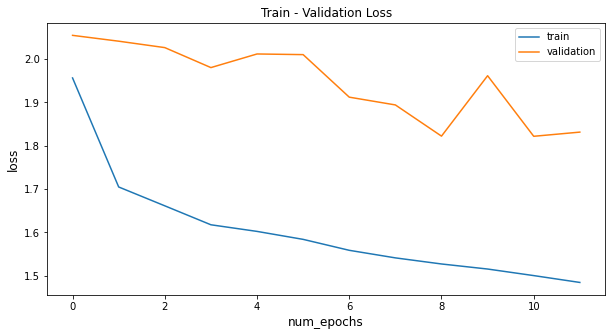

In [87]:
fig = plt.figure(figsize=(10,5))
plt.title("Train - Validation Loss")
plt.plot( train_loss, label='train')
plt.plot( val_loss, label='validation')
plt.xlabel('num_epochs', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.legend(loc='best')

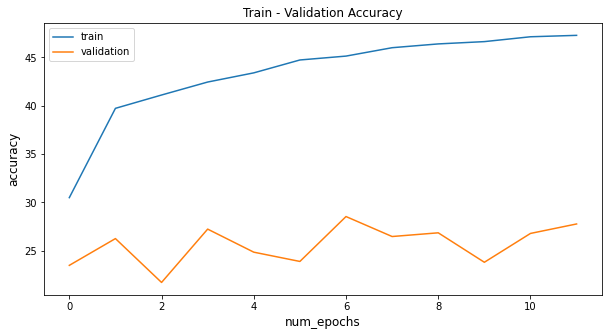

In [88]:
fig = plt.figure(figsize=(10,5))
plt.title("Train - Validation Accuracy")
plt.plot(train_acc, label='train')
plt.plot(val_acc, label='validation')
plt.xlabel('num_epochs', fontsize=12)
plt.ylabel('accuracy', fontsize=12)
plt.legend(loc='best')

## **Confusion Matrix**

In [89]:
dataset_all = torch.utils.data.DataLoader(data, batch_size=10000, shuffle=False)

In [90]:
model. to('cpu')

model.eval()
with torch.no_grad():
    num_correct = 0
    total = 0
    
    #set_trace ()
    for batch, (images,labels) in enumerate(train_loader,1):
        
        logps = model(images)
        output = torch.exp(logps)
        
        pred = torch.argmax(output,1)
        total += labels.size(0)
        
        num_correct += (pred==labels).sum().item()
        print(f'Batch ({batch} / {len(train_loader)})')
        
        # to check the accuracy of model on 5 batches
        
            
    print(f'Accuracy of the model on {total} test images: {num_correct * 100 / total }% ')

--qui

Batch (1 / 172)
Batch (2 / 172)
Batch (3 / 172)
Batch (4 / 172)
Batch (5 / 172)
Batch (6 / 172)
Batch (7 / 172)
Batch (8 / 172)
Batch (9 / 172)
Batch (10 / 172)
Batch (11 / 172)
Batch (12 / 172)
Batch (13 / 172)
Batch (14 / 172)
Batch (15 / 172)
Batch (16 / 172)
Batch (17 / 172)
Batch (18 / 172)
Batch (19 / 172)
Batch (20 / 172)
Batch (21 / 172)
Batch (22 / 172)
Batch (23 / 172)
Batch (24 / 172)
Batch (25 / 172)
Batch (26 / 172)
Batch (27 / 172)
Batch (28 / 172)
Batch (29 / 172)
Batch (30 / 172)
Batch (31 / 172)
Batch (32 / 172)
Batch (33 / 172)
Batch (34 / 172)
Batch (35 / 172)
Batch (36 / 172)
Batch (37 / 172)
Batch (38 / 172)
Batch (39 / 172)
Batch (40 / 172)
Batch (41 / 172)
Batch (42 / 172)
Batch (43 / 172)
Batch (44 / 172)
Batch (45 / 172)
Batch (46 / 172)
Batch (47 / 172)
Batch (48 / 172)
Batch (49 / 172)
Batch (50 / 172)
Batch (51 / 172)
Batch (52 / 172)
Batch (53 / 172)
Batch (54 / 172)
Batch (55 / 172)
Batch (56 / 172)
Batch (57 / 172)
Batch (58 / 172)
Batch (59 / 172)
Batch 

In [91]:
predictions, targets = [], []
for images, labels in train_loader:
    logps = model(images)
    output = torch.exp(logps)
    pred = torch.argmax(output, 1)

    # convert to numpy arrays
    pred = pred.detach().cpu().numpy()
    labels = labels.detach().cpu().numpy()
    
    for i in range(len(pred)):
        predictions.append(pred[i])
        targets.append(labels[i])

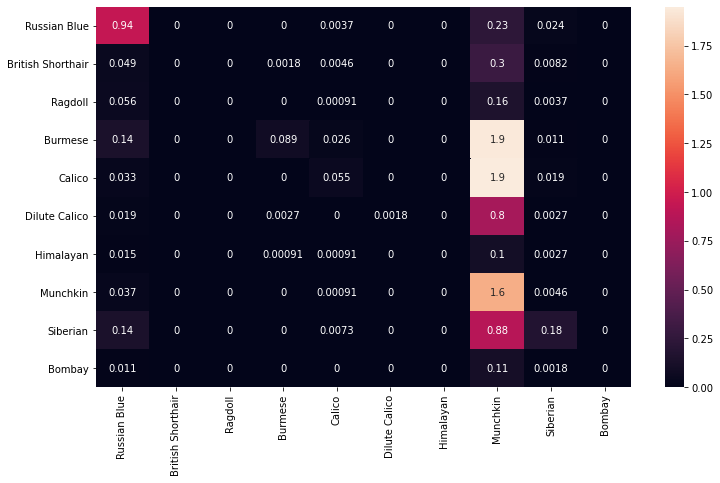

In [99]:
# constant for classes
classes = ('Russian Blue', 'British Shorthair', 'Ragdoll', 'Burmese',
       'Calico', 'Dilute Calico', 'Himalayan', 'Munchkin', 'Siberian',
       'Bombay')

# Build confusion matrix
cf_matrix = confusion_matrix(targets, predictions)
df_cm = pd.DataFrame(cf_matrix/np.sum(cf_matrix) *10, index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True)
plt.savefig('output.png')

In [ ]:
print(confusion_matrix.diag()/confusion_matrix.sum(1))


In [122]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score,roc_auc_score

accuracy = accuracy_score(targets, predictions)
F1_Score = f1_score(targets, predictions, average="macro")
Precision = precision_score(targets, predictions, average="macro")
Recall = recall_score(targets, predictions, average="macro")

print("Accuracy", accuracy, 'F1_Score', F1_Score, "Precision", Precision, 'Recall', Recall )



Accuracy 0.28983391129768205 F1_Score 0.14198460833239565 Precision 0.40391761759367417 Recall 0.19745948658367124


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
